### Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

### Importing data

In [2]:
### Read model database (excel) and save it as dataframe (df)
df = pd.read_excel("MODELS_DATABASE_complete_TV.xlsx")

print('Shape: ',df.shape, 'Keys: ', df.keys(), '\n')
#Get the number of rows and columns
print(f'Dataset size: {df.shape}','\n')

# for checking if any value in any data columns in null or NaN
print(df.isnull().sum())

Shape:  (500, 14) Keys:  Index(['Model', 'Width', 'Height', 'Thickness', 'Length', 'Velocity',
       'Mass_Im', 'Dynamic_Job', 'Time_req_s', 'Peak_Impact_Force_KN',
       'Energy_Absorbed_KJ', 'Deformation_CB_mm', 'Mean_impact_force_KN',
       'Mass_CB_g'],
      dtype='object') 

Dataset size: (500, 14) 

Model                   0
Width                   0
Height                  0
Thickness               0
Length                  0
Velocity                0
Mass_Im                 0
Dynamic_Job             0
Time_req_s              0
Peak_Impact_Force_KN    0
Energy_Absorbed_KJ      0
Deformation_CB_mm       0
Mean_impact_force_KN    0
Mass_CB_g               0
dtype: int64


### Data visulization

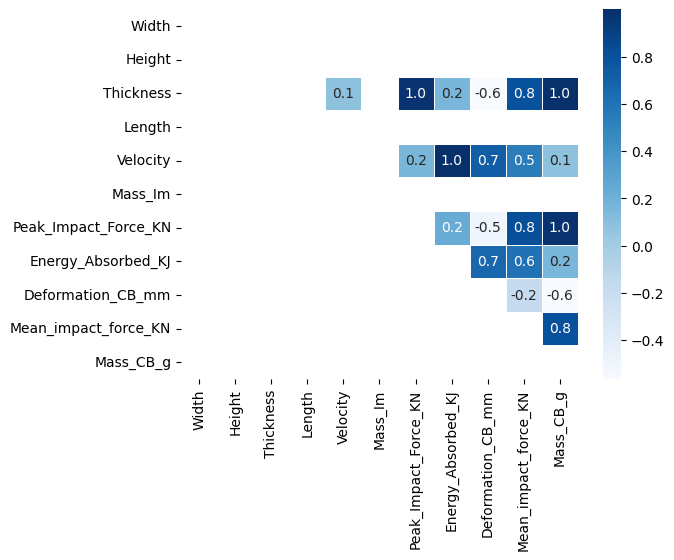

In [3]:
# Compute the correlation matrix
corr = df[['Width', 'Height', 'Thickness', 'Length', 'Velocity','Mass_Im', 'Peak_Impact_Force_KN', 'Energy_Absorbed_KJ',
       'Deformation_CB_mm', 'Mean_impact_force_KN', 'Mass_CB_g']].corr()

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, cmap='Blues', annot=True, fmt=".1f", linewidth=.5, mask=mask)

fig = sns_plot.get_figure()
fig.savefig("data_analysis.svg", bbox_inches='tight', dpi=1200)
fig.savefig("data_analysis.pdf", bbox_inches='tight', dpi=1200)

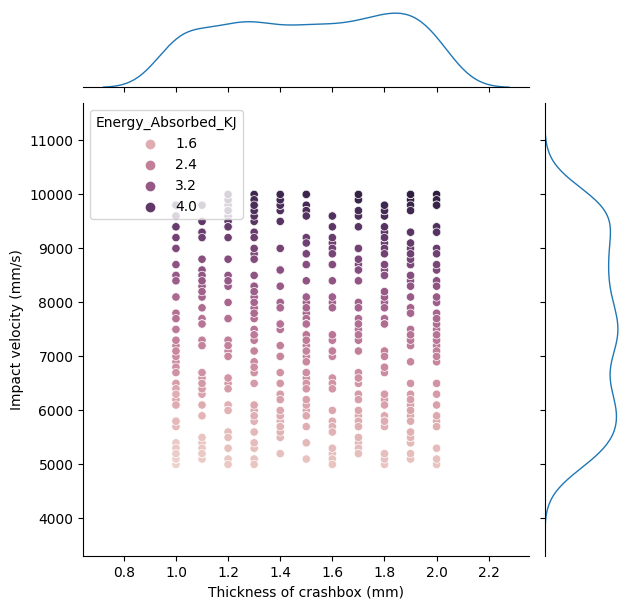

In [4]:
# check distribution of the input parameters (structural and crash test) 

# fig2 = sns.jointplot(data=df, x='Thickness', y='Velocity', hue='Energy_Absorbed_KJ', kind=kdeplot)

g = sns.JointGrid()
x, y = df["Thickness"], df["Velocity"]
h= df["Energy_Absorbed_KJ"] # output crashworthiness metrics # user can change
sns.scatterplot(x=x, y=y,  hue=h , ax=g.ax_joint)
sns.kdeplot(x=x, fill=False, linewidth=1, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=1, ax=g.ax_marg_y)
g.set_axis_labels(xlabel='Thickness of crashbox (mm)', ylabel='Impact velocity (mm/s)')

plt.savefig("data_analysis_scatter_kde.svg", bbox_inches='tight', dpi=1200)
plt.savefig("data_analysis_scatter_kde.pdf", bbox_inches='tight', dpi=1200)

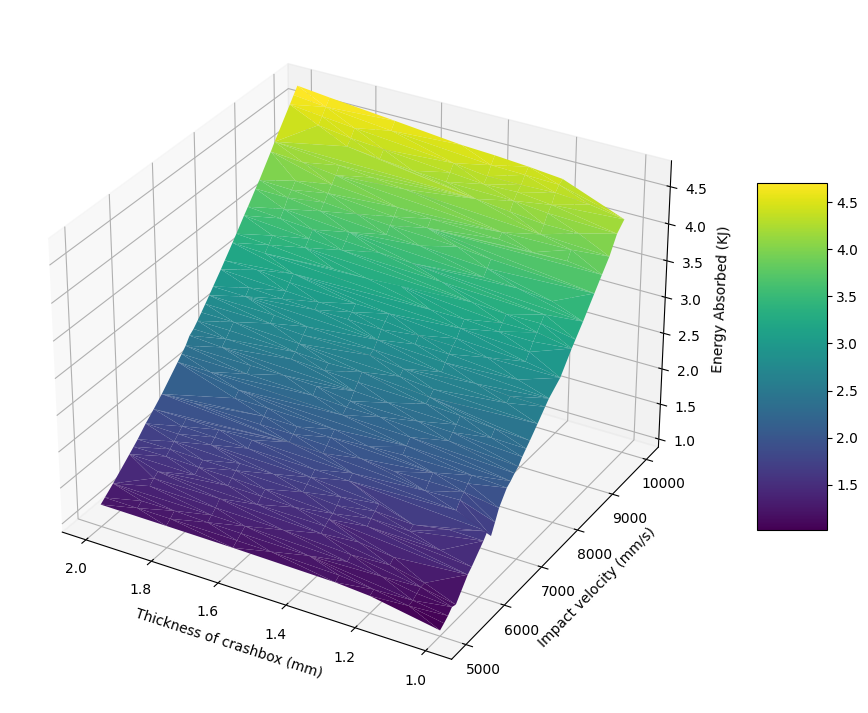

In [5]:
# Distribution of the objectives over the input parameters using seaborn and matplotlib

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
       
X=df["Thickness"]
Y=df["Velocity"]
# Z=df["Peak_Impact_Force_KN"]
Z=df["Energy_Absorbed_KJ"]
# Z=df["Deformation_CB_mm"]
# Z=df["Mean_impact_force_KN"]
# Z=df["Mass_CB_g"]

# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.viridis)

# invert the axis sorting
ax.invert_xaxis()
# Adding labels
ax.set_xlabel('Thickness of crashbox (mm)') 
ax.set_ylabel('Impact velocity (mm/s)') 
ax.set_zlabel('Energy Absorbed (KJ)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# save figure
plt.savefig("data_analysis_trisurf.svg", bbox_inches='tight', dpi=1200)
plt.savefig("data_analysis_trisurf.pdf", bbox_inches='tight', dpi=1200)

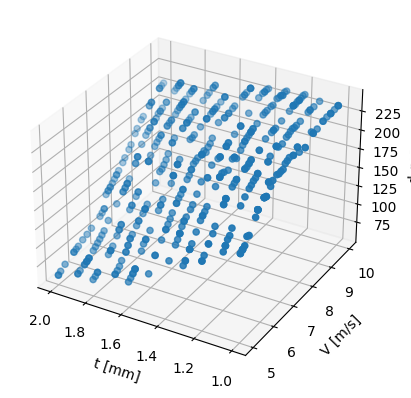

In [6]:
# Distribution of the objectives over the input parameters using matplotlib only

X=df["Thickness"]
Y=df["Velocity"]/1000
# Z=df["Peak_Impact_Force_KN"]
# Z=df["Energy_Absorbed_KJ"]
Z=df["Deformation_CB_mm"]
# Z=df["Mean_impact_force_KN"]
# Z=df["Mass_CB_g"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)
ax.set_xlabel('t [mm]'ing 
ax.invert_xaxis()
ax.set_ylabel('V [m/s]')
ax.set_zlabel('d_max')

plt.savefig("data_analysis_3d_plot_t_v_d.svg", bbox_inches='tight', dpi=1200)
plt.savefig("data_analysis_3d_plot_t_v_d.pdf", bbox_inches='tight', dpi=1200)
plt.savefig("data_analysis_3d_plot_t_v_d.png", bbox_inches='tight', dpi=1200)

### Pareto front for two objectives

In [7]:
# objectives as df
# here reduce IPCF and increase EA
# data = {'Objective 1': df["Peak_Impact_Force_KN"], 'Objective 2': df["Energy_Absorbed_KJ"]}

# here reduce d_max and increase EA
data = {'Objective 1': df["Energy_Absorbed_KJ"], 'Objective 2': df["Deformation_CB_mm"]}
df2 = pd.DataFrame(data)

# define pareto optimal front for objectives
pareto_front = []
for i in range(len(df2)):
  dominated = False
  for j in range(len(df2)):
    if (df2.loc[i, 'Objective 1'] < df2.loc[j, 'Objective 1']) and (df2.loc[i, 'Objective 2'] > df2.loc[j, 'Objective 2']):
      dominated = True
      break
  if not dominated:
    pareto_front.append(df2.iloc[i])

pareto_df = pd.DataFrame(pareto_front)

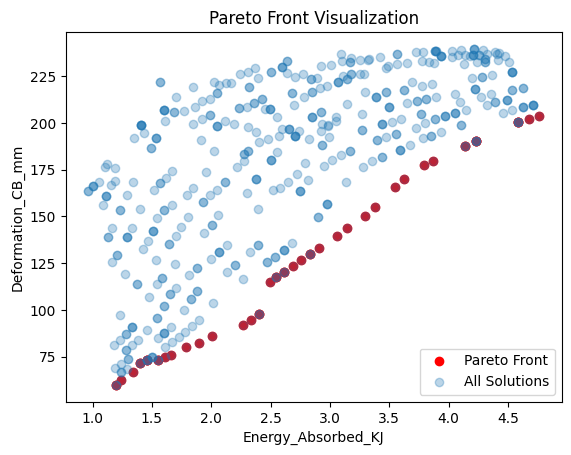

In [8]:
# plot pareto front 
plt.scatter(pareto_df['Objective 1'], pareto_df['Objective 2'], color='red', alpha=1, label='Pareto Front')
plt.scatter(df2['Objective 1'], df2['Objective 2'], alpha=0.3, label='All Solutions')
plt.xlabel('Energy_Absorbed_KJ')
plt.ylabel('Deformation_CB_mm')
plt.title('Pareto Front Visualization')
plt.legend()

# save figure
plt.savefig("Pareto_front.svg", bbox_inches='tight', dpi=1200)
plt.savefig("Pareto_front.pdf", bbox_inches='tight', dpi=1200)
plt.savefig("Pareto_front.png", bbox_inches='tight', dpi=1200)